# PRACTICA 2c - Web Scraping

## 0. INTRODUCCIÓN

En este vamos a trabajar la extracción automática de datos de la web, proceso Conocido como web scraping. Antes de ponernos manos a la obra, vamos a Refrescar algunos conceptos e introducir puntos claves de las librerías con las que vamos a trabajar. 
 
En la web, los servidores y los clientes generalmente se comunican a través de solicitudes HTTP. 
El protocolo HTTP (‘Hyper Text Transfer Protocol’) especifica cómo se formatean y transmiten las solicitudes y respuestas. 
Mediante este proceso solicitud-respuesta, es como se realiza la mayor parte de la navegación web. Al abrir una página, el navegador envía una solicitud al servidor de esa página, y el servidor responde con los recursos relevantes (texto, imágenes, tablas, etc. ).

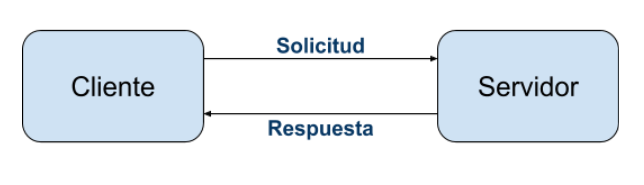






Principalmente, hay dos tipos de **solicitudes**:

1.   GET


 	
- Permiten obtener datos del servidor.
- Se puede marcar como favorito. 		
- Los parámetros se agregan directamente a la URL.
- No se utiliza para enviar información confidencial (como contraseñas)
 			

2.   POST
 	
- Normalmente	se usa cuando un estado necesita ser alterado (como agregarle elementos carrito de compras) o al enviar contraseñas.
- Los parámetros se agregan en un cuerpo separado, así es más seguro
- No se puede marcar como favorito.
 	
 


La **respuesta** contiene 2 piezas principales de información: el código de estado y el cuerpo de la respuesta.
 
- El __código de estado__ indica si la solicitud fue exitosa y / o la existencia de algún error. Está representado por un número de 3 dígitos.

  - Los códigos en estos rangos indican:

    - 2xx: Éxito.
    - 3xx: Redirección.
    - 4xx: Error del cliente.
    - 5xx: Error del servidor.
 
  - Los dos códigos más frecuentes son los siguientes:
    - 200 OK: La solicitud se cursó exitosamente.
    - 404 Not Found: El servidor no puede encontrar la página o fuente solicitada. 

- El __cuerpo de la respuesta__ contiene la información de la solicitud. Normalmente, se obtiene en formato HTML o JSON.



---

Un **documento HTML** está formado por un conjunto de elementos o etiquetas anidadas, además de código JavaScript y CSS.

Antes de hacer scraping, por tanto, debemos conocer qué elementos o qué etiqueta contiene la información que queremos obtener de la página web en cuestión. Para ello, tenemos que tener presente las siguientes consideraciones:

- Un elemento o etiqueta tiene la siguiente sintaxis:

> **\<nombre_etiqueta\>**contenido **\<\/nombre_etiqueta\>**

> Estos elementos pueden tener información adicional especificada en los atributos de la etiqueta.


- Los atributos más comunes son:

  - id

  - class

> Ejemplo: \<div class=“descriptive-class-name”\>….\<\/div\>





- Las etiquetas más populares son:

  - link: \<a href=“url_of_link”\>Texto del link\<\/a\>
  - párrafo: \<p\>…\<\/p\>
  - .... \<h1\>…\<\/h1\>
  - etiqueta de un contenedor o conjunto de etiquetas: \<div class=“hahaha”\>…\<\/div\>
  - Etiqueta para marcar parte del contenido: \<span id=“id de este span”\>…\<\/span\>








_Ejemplo esquema básico de un documento HTML_




```
<html>
	<head>
		<meta charset=”utf-8”/>
		<title> Ejemplo </title>
	</head>
	<body>
		<h1> Encabezado 1</h1>
		<p> Primer párrafo del ejemplo del html de ejemplo. </p>
		<h2> Encabezado 2.  </h2>
			<ul>
				<li>Element 1 de la lista</li>
				<li>Element 2 de la lista</li>
			</ul>
    <div>
      <p>Segundo párrafo. </p> 
      <table>
        <th>Tabla de ejemplo </th>
        <tr>
          <td>celda 1,1 </td>
          <td>celda 1,2 </td>
          <td>celda 1,3 </td>
        </tr>
        <tr>
          <td>celda 2,1 </td>
          <td>celda 2,2 </td>
          <td>celda 2,3 </td>
        </tr>
      </table>
    </div>
	</body>
</html>

```




---

Las **principales metodologías** que nos permiten hacer web scraping son:

- Utilizando APIs (Application programming interface)
- Mediante Scrapers (librerías que nos permiten extraer datos web automáticamente. Por ejemplo, BeautifulSoap, Requests-html,...)
- Web crawling (un programa ‘spider’ busca por el contenido solicitado siguiendo links y explorandolos).
 



**Las dos primeras metodologías las vamos a trabajar en las diferentes partes de esta PRACTICA mediante los ejercicios planteados. La tercera de ellas, junto con el web scraping en streaming, la trabajaremos en la PAC3.**

## 3. SCRAPING CON TABLAS

Un caso particular de etiquetas cuyo contenido se quiera scrapear son las **tablas**. Este proceso se puede hacer como lo hemos hecho en la sección anterior, utilizando BeautifulSoup y seleccionando las etiquetas relativas a la tabla; o, utilizando la librería pandas. 

> Etiquetas relativas a las tablas:
>- \<table\> :  define la tabla
>- \<tr\> :  crea una fila de la tabla
>- \<td\> :  crea una celda con los datos de la tabla (dentro de una fila)
>- \<th\> :  cabecera de la tabla


Para familiarizarnos con la obtención de datos presentados en tablas, vamos a obtener los valores de la tabla que indican cómo se reparten los refugiados alrededor del mundo. Esta tabla está disponible en la entrada de Wikipedia: https://es.wikipedia.org/wiki/Refugiado

- Utilizando _BeautifulSoup_

In [2]:
# Cargar librerías
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url_base= 'https://es.wikipedia.org/wiki/Refugiado'
r = requests.get(url_base)
r.status_code

200

In [4]:
# get the HTML content from the webpage
html = r.content

# Create the soup
soup = BeautifulSoup(html, "html.parser")

In [5]:
#Obtener la tabla
tabla= soup.find("table", attrs={"class": "wikitable"})

In [6]:
# Obtener la cabecera de las columnas
ths=tabla.find("tbody").find_all('th')

col_headings= [th.text.strip('\n') for th in ths]
col_headings

['Área geográfica', 'Número de refugiados[3]\u200b']

In [7]:
#Obtener las filas
trs=tabla.find("tbody").find_all('tr')

#Obtener las celdas por fila
tds= [tr.find_all('td') for tr in trs]

In [8]:
#Crar lista con el valor de las filas
table=[]
for i in range(1,len(tds)):
    table.append([tt.text.strip('\n') for tt in tds[i]])

In [9]:
#Generar el dataframe resultante que contiene la tabla
df_tabla=pd.DataFrame(table,columns=col_headings)
df_tabla

,Área geográfica,Número de refugiados[3]​
0,Oriente Medio,2.580.638
1,Sudeste asiático,2.974.316
2,Asia central,218.584
3,Asia meridional,1.304.189
4,Asia del Este y Pacífico,901.525
5,Total Asia,7.979.251
6,Europa oriental,1.617.214
7,Europa del Sudeste,708.132
8,Europa central y Estados bálticos,616.132
9,Europa occidental,1.798.914


Como se ha podido observar, es necesario revisar cómo queda el contenido de la tabla para realizar una limpieza de datos en caso de ser necesario.

En este ejemplo se ha eliminado el carácter _'\n'_ para poder considerar la segunda columna como valor numérico en caso de ser necesario realizar algún cálculo.

- Utilizando _Pandas_

In [10]:
url_base= 'https://es.wikipedia.org/wiki/Refugiado'
r = requests.get(url_base)

# Hay que hacer !pip install lxml y reiniciar el vstudio para que funcione
df_tabla=pd.read_html(r.text)[1] #La tabla de los refugiados es la segunda tabla que aparece en la página, i.e, [1]
df_tabla

,Área geográfica,Número de refugiados[3]​
0,Oriente Medio,2.580.638
1,Sudeste asiático,2.974.316
2,Asia central,218.584
3,Asia meridional,1.304.189
4,Asia del Este y Pacífico,901.525
5,Total Asia,7.979.251
6,Europa oriental,1.617.214
7,Europa del Sudeste,708.132
8,Europa central y Estados bálticos,616.132
9,Europa occidental,1.798.914


#### **Ejercicio Práctico 4** (scraping de tablas - Economias del Carbono)


Realizar _web scraping_ para obtener las siguientes dos tablas:

- La tabla con los datos relativos al PIB por país y región.  _(usando pandas)_ (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)). 

- La tabla con los datos relativos a las emisiones de CO2 por país. _(usando BeautifulSoup)_ (https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions).


Una vez obtenidas las tablas y generado un dataframe diferente por cada una (df_pib, df_co2, respectivamente), se solicita:

- Revisar los dataframes obtenidos y realizar una ligera limpieza: Para el df_pib, la limpieza será fácil y consistirá en sacar los países cuyos valores no sean puramente numéricos. Para el df_CO2, aplicar el código que se muestra. Es importante respetar las columnas que se indican para que el código de limpieza funcione.

- Con el df_pib:
  - Añadir al DataFrame una columna con el PIB relativo de cada país respecto al mundial.
  - Crear y mostrar un segundo dataframe (por ejemplo, df_pib_regiones) con las regiones mundiales reportadas en la tabla del PIB por país y agregar los valores del PIB por región.
  - Representar en un diagrama de barras los 30 primeros países por PIB (sea en valores relativos o absolutos).
  - Representar en un diagrama de barras las 5 regiones con sus PIB agregados (sea en valores relativos o absolutos).
  - ¿Cuál es tercer país con mayor PIB del mundo?
  - ¿Cuál es la tercera región con mayor PIB del mundo?

- Con el df_co2:
  - Ordenar el dataframe por emisiones (de más emisiones a menos emisiones) y mostrar los 20 conceptos (no necesariamente países) que más emisiones generan. Se deben utilizar las del 2017.
  - Representar en un diagrama de barras los 20 conceptos que más emisiones generan. Es decir, cada barra representará el valor de un concepto (no necesariamente un país).

- Con los dos DataFrames anteriores, crear un DataFrame conjunto (por ejemplo, df_pib_co2) de modo que:
  - La primera columna sea el país, la segunda y tercera columna sean el % de emisiones CO2 y el % de PIB, sin importar el orden.
  - Añadir a ese DataFrame una cuarta columna que reporte la incidencia del carbono en la economía, es decir la diferencia entre las emisiones de CO2 y el PIB respecto al PIB, todo en valores relativos. El cálculo de la ratio sería el siguiente: ((% CO2 - % PIB)/% PIB)x100
  - Ordenarlo de forma descendente y mostrar las 10 economías con mayor incidencia de carbono.
  - ¿Cuál es el valor de esa ratio para Suecia?
 
>NOTA:  
>- Para hacer el Dataframe conjunto utilizar la función .merge() con parámetro 'inner' y en base a la columna que reporta el nombre del país.

- La tabla con los datos relativos al PIB por país. (usando pandas)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url_base= 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
r = requests.get(url_base)
df_pib = pd.read_html(r.text)[2]

df_pib = df_pib['Country/Territory'].merge(df_pib['UN Region'], left_index=True, right_index=True).merge(df_pib['IMF[1][13]'], left_index=True, right_index=True)

pib_mundial = int(df_pib['Estimate'][0])

df_pib = df_pib.drop(index=[0,3])

df_pib


,Country/Territory,UN Region,Estimate,Year
1,United States,Americas,25035164,2022
2,China,Asia,18321197,[n 1]2022
4,Japan,Asia,4300621,2022
5,Germany,Europe,4031149,2022
6,India,Asia,3468566,2022
...,...,...,...,...
213,Palau,Oceania,226,2022
214,Kiribati,Oceania,207,2022
215,Nauru,Oceania,134,2022
216,Montserrat,Americas,—,—


  - Añadir al DataFrame una columna con el PIB relativo de cada país respecto al mundial.

In [13]:
df_pib = df_pib.drop(df_pib[df_pib['Estimate'] == '—'].index)

df_pib['Estimate'] = df_pib['Estimate'].astype('int64', errors='ignore')

df_pib['pib relativo'] = df_pib['Estimate'] / pib_mundial

df_pib


,Country/Territory,UN Region,Estimate,Year,pib relativo
1,United States,Americas,25035164,2022,2.465040e-01
2,China,Asia,18321197,[n 1]2022,1.803962e-01
4,Japan,Asia,4300621,2022,4.234524e-02
5,Germany,Europe,4031149,2022,3.969194e-02
6,India,Asia,3468566,2022,3.415257e-02
...,...,...,...,...,...
211,Marshall Islands,Oceania,271,2022,2.668350e-06
213,Palau,Oceania,226,2022,2.225266e-06
214,Kiribati,Oceania,207,2022,2.038186e-06
215,Nauru,Oceania,134,2022,1.319405e-06


  - Crear y mostrar un segundo dataframe (por ejemplo, df_pib_regiones) con las regiones mundiales reportadas en la tabla del PIB por país y agregar los valores del PIB por región.

In [14]:
df_pib_regiones = df_pib[['UN Region', 'Estimate']].groupby('UN Region').sum()

df_pib_regiones = df_pib_regiones.reset_index()

df_pib_regiones


,UN Region,Estimate
0,Africa,2988527
1,Americas,33088519
2,Asia,40003068
3,Europe,23715435
4,Oceania,2008954


  - Representar en un diagrama de barras los 30 primeros países por PIB (sea en valores relativos o absolutos).

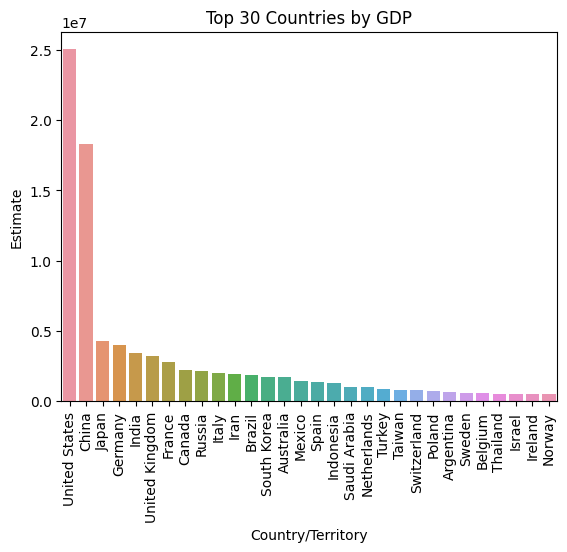

In [15]:
df_pib_30 = df_pib[:30]

sns.barplot(data=df_pib_30, x='Country/Territory', y='Estimate')
plt.title('Top 30 Countries by GDP')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()


  - Representar en un diagrama de barras las 5 regiones con sus PIB agregados (sea en valores relativos o absolutos).

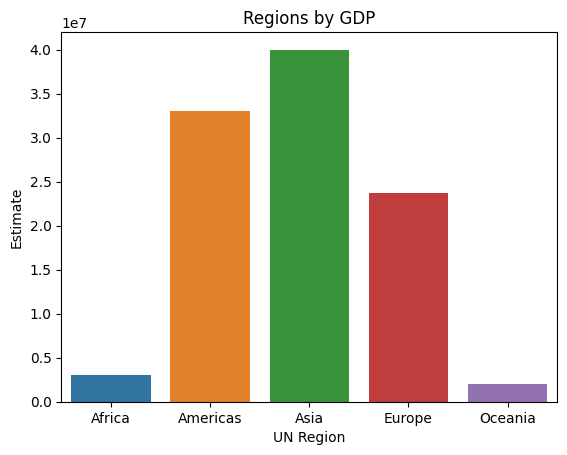

In [16]:
sns.barplot(data=df_pib_regiones, x='UN Region', y='Estimate')
plt.title('Regions by GDP')
plt.show()


  - ¿Cuál es tercer país con mayor PIB del mundo?


In [17]:
df_pib_30[2:3]['Country/Territory']

4    Japan
Name: Country/Territory, dtype: object

  - ¿Cuál es la tercera región con mayor PIB del mundo?

In [18]:
df_pib_regiones[2:3]['UN Region']

2    Asia
Name: UN Region, dtype: object

- La tabla con los datos relativos a las emisiones de dióxido de carbono por país. (usando BeautifulSoup)

In [19]:
url_base= 'https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'
r = requests.get(url_base)
html = r.content

soup = BeautifulSoup(html, 'html.parser')

main_content = soup.find(class_='mw-body-content mw-content-ltr')

pre_table = main_content.find(class_='mw-parser-output')('table')[1]

table = pre_table.find_all('td')

my_dict = {'Country/Territory': [],
            'emissions': []
            }

count = 0
for element in table:
    if count == 0:
        my_dict['Country/Territory'].append("".join(element.text.split()))
    if count == 3:
        element = "".join([digit for digit in element.text if digit != ','])
        my_dict['emissions'].append(element)
    count +=1
    if count == 10:
        count = 0

df_co2 = pd.DataFrame(my_dict)

df_co2


,Country/Territory,emissions
0,World,37077.404
1,World–InternationalAviation,543.381
2,World–InternationalShipping,677.248
3,Afghanistan,11.422
4,Albania,5.026
...,...,...
207,Vietnam,218.729
208,WesternSahara,0.276
209,Yemen,12.503
210,Zambia,4.967


 - Ordenar el dataframe por emisiones (de más emisiones a menos emisiones) y mostrar los 20 conceptos (no necesariamente países) que más emisiones generan. Se deben utilizar las del 2017.

In [20]:
df_co2['emissions'] = df_co2['emissions'].astype('float', errors='raise')

world_emissions = int(df_co2['emissions'][0])

df_co2['co2 relativo'] = df_co2['emissions'] / world_emissions

df_co2_20 = df_co2.sort_values(by='emissions', ascending=False)[:20]

df_co2_20 = df_co2_20.drop(index=[0])

df_co2_20


,Country/Territory,emissions,co2 relativo
42,China,10877.218,0.293368
202,UnitedStates,5107.393,0.137751
67,EuropeanUnion,3548.345,0.095702
93,India,2454.774,0.066207
158,Russia,1764.866,0.047600
102,Japan,1320.776,0.035623
77,Germany,796.529,0.021483
2,World–InternationalShipping,677.248,0.018266
178,SouthKorea,673.324,0.018160
95,Iran,671.450,0.018110


  - Representar en un diagrama de barras los 20 conceptos que más emisiones generan. Es decir, cada barra representará el valor de un concepto (no necesariamente un país).


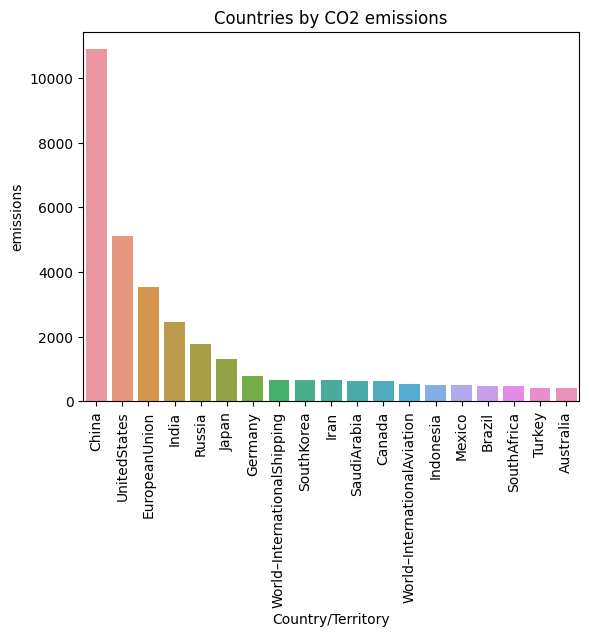

In [21]:
sns.barplot(data=df_co2_20, x='Country/Territory', y='emissions')
plt.title('Countries by CO2 emissions')
plt.tick_params(axis='x', labelrotation = 90)
plt.show()


Con los dos DataFrames anteriores, crear un DataFrame conjunto (por ejemplo, df_pib_co2) de modo que:
  - La primera columna sea el país, la segunda y tercera columna sean el % de emisiones CO2 y el % de PIB, sin importar el orden.

In [22]:
df_pib = df_pib.set_index('Country/Territory')
df_co2  = df_co2.set_index('Country/Territory')


In [23]:
df_pib_co2 = df_co2.merge(df_pib, left_index=True, right_index=True)

df_pib_co2 = df_pib_co2.reset_index()

df_pib_co2


,Country/Territory,emissions,co2 relativo,UN Region,Estimate,Year,pib relativo
0,Afghanistan,11.422,0.000308,Asia,20136,2020,0.000198
1,Albania,5.026,0.000136,Europe,18256,2022,0.000180
2,Algeria,159.929,0.004313,Africa,187155,2022,0.001843
3,Angola,30.876,0.000833,Africa,124794,2022,0.001229
4,Argentina,209.968,0.005663,Americas,630698,2022,0.006210
...,...,...,...,...,...,...,...
141,Venezuela,145.877,0.003934,Americas,82145,2022,0.000809
142,Vietnam,218.729,0.005899,Asia,413808,2022,0.004074
143,Yemen,12.503,0.000337,Asia,27594,2022,0.000272
144,Zambia,4.967,0.000134,Africa,27025,2022,0.000266


  - Añadir a ese DataFrame una cuarta columna que reporte la incidencia del carbono en la economía, es decir la diferencia entre las emisiones de CO2 y el PIB respecto al PIB, todo en valores relativos. El cálculo de la ratio sería el siguiente: ((% CO2 - % PIB)/% PIB)x100


In [24]:
df_pib_co2['incidencia carbono-economía %'] = ((df_pib_co2['co2 relativo'] - df_pib_co2['pib relativo']) / df_pib_co2['pib relativo']) * 100

df_pib_co2


,Country/Territory,emissions,co2 relativo,UN Region,Estimate,Year,pib relativo,incidencia carbono-economía %
0,Afghanistan,11.422,0.000308,Asia,20136,2020,0.000198,55.378495
1,Albania,5.026,0.000136,Europe,18256,2022,0.000180,-24.588285
2,Algeria,159.929,0.004313,Africa,187155,2022,0.001843,134.071073
3,Angola,30.876,0.000833,Africa,124794,2022,0.001229,-32.228159
4,Argentina,209.968,0.005663,Americas,630698,2022,0.006210,-8.808656
...,...,...,...,...,...,...,...,...
141,Venezuela,145.877,0.003934,Americas,82145,2022,0.000809,386.438172
142,Vietnam,218.729,0.005899,Asia,413808,2022,0.004074,44.786958
143,Yemen,12.503,0.000337,Asia,27594,2022,0.000272,24.114216
144,Zambia,4.967,0.000134,Africa,27025,2022,0.000266,-49.655687


  - Ordenarlo de forma descendente y mostrar las 10 economías con mayor incidencia de carbono.


In [25]:
df_pib_co2.sort_values(by='incidencia carbono-economía %', ascending=False)[:10]

,Country/Territory,emissions,co2 relativo,UN Region,Estimate,Year,pib relativo,incidencia carbono-economía %
107,Palau,1.411,0.000038,Oceania,226,2022,0.000002,1610.174918
141,Venezuela,145.877,0.003934,Americas,82145,2022,0.000809,386.438172
94,Mongolia,25.747,0.000694,Asia,15720,2022,0.000155,348.637993
80,Libya,57.584,0.001553,Africa,40836,2022,0.000402,286.260761
139,Uzbekistan,95.350,0.002572,Asia,79117,2022,0.000779,230.120766
70,Kazakhstan,266.207,0.007180,Asia,224338,2022,0.002209,225.041329
74,Kyrgyzstan,11.180,0.000302,Asia,9750,2022,0.000096,214.093642
137,Ukraine,205.723,0.005549,Europe,199719,[n 8]2022,0.001966,182.153488
135,Turkmenistan,72.474,0.001955,Asia,74439,2022,0.000733,166.688114
77,Lebanon,23.102,0.000623,Asia,24494,2020,0.000241,158.351998


  - ¿Cuál es el valor de esa ratio para Suecia?

In [26]:
df_pib_co2[df_pib_co2['Country/Territory'] == 'Sweden']['incidencia carbono-economía %']


126   -76.925251
Name: incidencia carbono-economía %, dtype: float64

In [27]:
df_pib_co2.sort_values(by='incidencia carbono-economía %', ascending=False)[:40]

,Country/Territory,emissions,co2 relativo,UN Region,Estimate,Year,pib relativo,incidencia carbono-economía %
107,Palau,1.411,0.000038,Oceania,226,2022,0.000002,1610.174918
141,Venezuela,145.877,0.003934,Americas,82145,2022,0.000809,386.438172
94,Mongolia,25.747,0.000694,Asia,15720,2022,0.000155,348.637993
80,Libya,57.584,0.001553,Africa,40836,2022,0.000402,286.260761
139,Uzbekistan,95.350,0.002572,Asia,79117,2022,0.000779,230.120766
70,Kazakhstan,266.207,0.007180,Asia,224338,2022,0.002209,225.041329
74,Kyrgyzstan,11.180,0.000302,Asia,9750,2022,0.000096,214.093642
137,Ukraine,205.723,0.005549,Europe,199719,[n 8]2022,0.001966,182.153488
135,Turkmenistan,72.474,0.001955,Asia,74439,2022,0.000733,166.688114
77,Lebanon,23.102,0.000623,Asia,24494,2020,0.000241,158.351998


#### **Ejercicio Práctico 5** (Series mejor valoradas 2021-2022 - Filmaffinity) 

Tener una suscripción de Netflix y no saber que ver es un problema común. Como la mayoría de vosotros ya conoceréis, existen diferentes páginas web que ofrecen información muy detallada y continuamente actualizada sobre contenido audiovisual que ayuda a escoger cuál va a ser la siguiente serie para ver.

Entre toda la multitud de información que se puede consultar, en este ejercicio nos vamos a centrar en conocer cuáles son por el momento las 10 series mejor valoradas (por el momento) desde 2021 hasta ahora y las 5 peores. Así sabremos que serie podemos ver y cuál mejor no intentarlo.

Vamos a consultar el ranking que ofrece FilmAffinity ordenado descendientemente por número de votos y filtrando por Series desde el 2021 hasta ahora que estén en Netflix.

- FilmAffinity: https://www.filmaffinity.com/es/topgen.php?genres=&chv=0&orderby=rc&movietype=serie%7C&country=&fromyear=2021&toyear=2022&ratingcount=3&runtimemin=0&runtimemax=4&platforms%5B%5D=8

A partir de la lista, se pide la siguiente información para cada una de las series:
- Título
- Ranking
- Puntuación
- Número de votos
- url completa de la película (url_base + url_relativa)

La información scrapeada será organizada en un dataframe de forma que cada característica esté dispuesta en una columna. 

Con este DataFrame, se pide para finalizar las 10 series mejor puntuadas y las 5 peor puntuadas, ambos en formato Dataframe con la misma estructura que el anterior (Título, Ranking, Puntuación, Número de votos y link).

In [57]:
url_base = "https://www.filmaffinity.com/es/topgen.php?genres=&chv=0&orderby=rc&movietype=serie%7C&country=&fromyear=2021&toyear=2022&ratingcount=3&runtimemin=0&runtimemax=4&platforms%5B%5D=8" 

r = requests.get(url_base)
html = r.content

soup = BeautifulSoup(html, 'html.parser')

movie_grid = soup.find_all(class_='movie-card mc-flex movie-card-0')
points_grid = soup.find_all(class_='data')

movies_list = []
for index, movie in enumerate(movie_grid):
    ranking = index + 1
    title = movie.find(class_='mc-title').text
    url_movie = movie.find(class_='mc-title')('a')[0]['href']
    points = points_grid[index].find(class_='avg-rating').text
    votes = points_grid[index].find(class_='rat-count').text

    movies_dict = {'Título': title,
                    'Ranking': ranking,
                    'Puntuación': points,
                    'Nº de votos': votes,
                    'url completa de la película': url_movie
                    }
    
    movies_list.append(movies_dict)

df_movies = pd.DataFrame(movies_list)

df_movies


,Título,Ranking,Puntuación,Nº de votos,url completa de la película
0,El juego del calamar (Serie de TV) (2021),1,"7,0",31.035,https://www.filmaffinity.com/es/film540777.html
1,El inocente (Miniserie de TV) (2021),2,"6,7",13.139,https://www.filmaffinity.com/es/film974382.html
2,Stranger Things 4 (Serie de TV) (2022),3,"7,6",11.346,https://www.filmaffinity.com/es/film206372.html
3,Arcane: League of Legends (Serie de TV) (2021),4,"8,2",10.245,https://www.filmaffinity.com/es/film615684.html
4,Monstruo: La historia de Jeffrey Dahmer (Minis...,5,"7,0",9.111,https://www.filmaffinity.com/es/film940669.html
5,Misa de medianoche (Miniserie de TV) (2021),6,"6,6",8.593,https://www.filmaffinity.com/es/film434676.html
6,La asistenta (Miniserie de TV) (2021),7,"7,4",7.805,https://www.filmaffinity.com/es/film654299.html
7,Sky Rojo (Serie de TV) (2021),8,"5,3",6.162,https://www.filmaffinity.com/es/film425126.html
8,El caso Hartung (Serie de TV) (2021),9,"6,9",5.815,https://www.filmaffinity.com/es/film434901.html
9,"Love, Death + Robots. Volumen 2 (Miniserie de ...",10,"6,7",5.786,https://www.filmaffinity.com/es/film528128.html


Las diez mejor puntuadas:

In [61]:
df_movies = df_movies.sort_values(by='Puntuación', ascending=False)

df_movies[:10]


,Título,Ranking,Puntuación,Nº de votos,url completa de la película
3,Arcane: League of Legends (Serie de TV) (2021),4,"8,2",10.245,https://www.filmaffinity.com/es/film615684.html
11,Cortar por la línea de puntos (Serie de TV) (2...,12,"8,1",5.358,https://www.filmaffinity.com/es/film192119.html
28,Bo Burnham: Inside (TV) (2021),29,"7,9",2.904,https://www.filmaffinity.com/es/film597232.html
2,Stranger Things 4 (Serie de TV) (2022),3,"7,6",11.346,https://www.filmaffinity.com/es/film206372.html
22,Heartstopper (Serie de TV) (2022),23,"7,6",3.457,https://www.filmaffinity.com/es/film817757.html
6,La asistenta (Miniserie de TV) (2021),7,"7,4",7.805,https://www.filmaffinity.com/es/film654299.html
29,Las de la última fila (Miniserie de TV) (2022),30,"7,1",2.807,https://www.filmaffinity.com/es/film717016.html
17,"Love, Death + Robots. Volumen 3 (Miniserie de ...",18,"7,0",3.791,https://www.filmaffinity.com/es/film853379.html
4,Monstruo: La historia de Jeffrey Dahmer (Minis...,5,"7,0",9.111,https://www.filmaffinity.com/es/film940669.html
0,El juego del calamar (Serie de TV) (2021),1,"7,0",31.035,https://www.filmaffinity.com/es/film540777.html


Las cinco peor puntuadas:

In [62]:
df_movies[-5:]


,Título,Ranking,Puntuación,Nº de votos,url completa de la película
16,Clickbait (Miniserie de TV) (2021),17,"6,2",3.938,https://www.filmaffinity.com/es/film138918.html
14,Detrás de sus ojos (Miniserie de TV) (2021),15,"6,0",4.110,https://www.filmaffinity.com/es/film148639.html
25,El gabinete de curiosidades: El trastero 36 (T...,26,"5,8",3.039,https://www.filmaffinity.com/es/film686867.html
18,Vigilante (Serie de TV) (2022),19,"5,6",3.784,https://www.filmaffinity.com/es/film650608.html
7,Sky Rojo (Serie de TV) (2021),8,"5,3",6.162,https://www.filmaffinity.com/es/film425126.html
